In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

# Patient 8 THY

## 3M Littmann Data

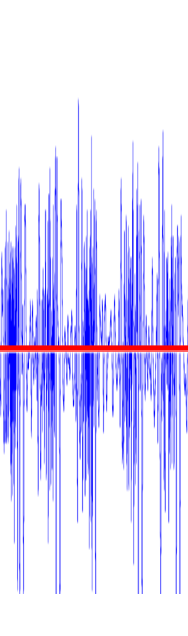

In [2]:
#image = Image.open('3M.bmp')
image = Image.open('3M_thy_pre_s.bmp')
image

In [3]:
x = image.size[0]
y = image.size[1]

In [4]:
print(x)
print(y)

188
636


In [5]:
matrix = []
points = []
integrated_density = 0

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(image.getpixel((i,j)))
        #integrated_density += image.getpixel((i,j))[1]
        #points.append(image.getpixel((i,j))[1])

### Extract Red Line Position

In [6]:
redMax = 0
xStore = 0
yStore = 0
for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        if currentPoint[0] == 255 and currentPoint[1] < 10 and currentPoint[2] < 10:
            redMax = currentPoint[0]
            xStore = xAxis
            yStore = yAxis
            
print(xStore, yStore)

187 349


### Extract Blue Points

In [7]:
redline_pos = 349
gain = 120
absMax = 0
littmannArr = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[2] == 255 and currentPoint[0] < 220 and currentPoint[1] < 220:
            points_vertical.append(yAxis)
            
    #print(points_vertical)
    
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if abs(item-redline_pos) > absMax:
            absMax = abs(item-redline_pos)
            theOne = item 
    littmannArr.append((theOne-redline_pos)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

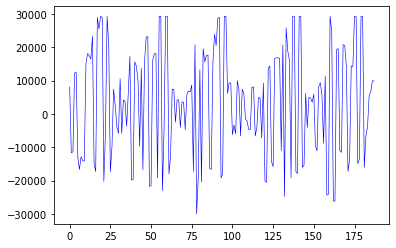

In [8]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

# Ascul Pi Data

In [9]:
pathBase = 'C://Users//triti//OneDrive//Dowrun//Text//Manuscripts//Data//TianHaoyang//AusculPi//'
filename = 'Numpy_Array_File_2020-06-18_11_02_04.npy'
line = pathBase + filename
arr = np.load(line)
arr

array([[   411,    397,    397, ...,    276,    265,    267],
       [   305,    289,    315, ...,    225,    252,    283],
       [   341,    333,    350, ...,    337,    365,    371],
       ...,
       [  -468,   -496,   -491, ...,  15989,  16102,  16244],
       [ 16400,  16538,  16658, ..., -32768, -32768, -32768],
       [-32768, -32768, -32768, ...,  18317,  18451,  18571]], dtype=int16)

In [10]:
arr.shape

(2583, 512)

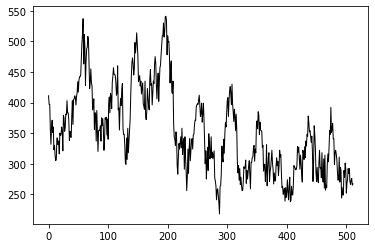

In [11]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[0], linewidth=1.0, color='black')

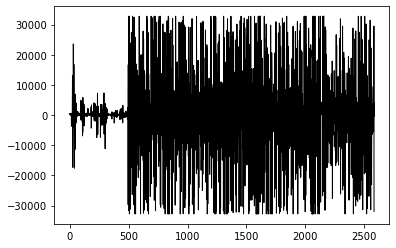

In [12]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[:,100], linewidth=1.0, color='black')

In [13]:
start = 1202
end = 1420

start_adj = int(start * 2583 / 3000)
end_adj = int(end * 2583 / 3000)

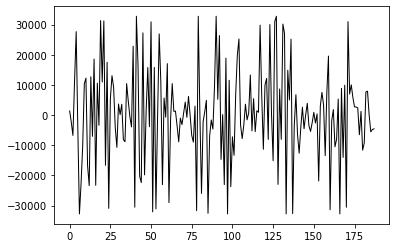

In [14]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[start_adj:end_adj,400], linewidth=1, color='black')

In [15]:
start_adj-end_adj

-188

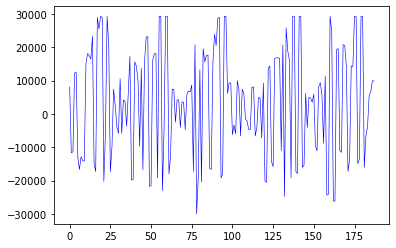

In [16]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

In [17]:
asculArr = arr[start_adj:end_adj,400]

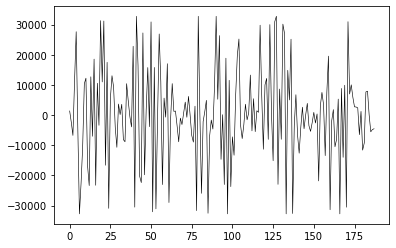

In [18]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr, linewidth=0.6, color='black')

## Preprocess the two array

In [33]:
asculArr_processed = []
littmannArr_processed = []

for ascul in asculArr:
    asculArr_processed.append(math.fabs(ascul))
    
for item in littmannArr:
    littmannArr_processed.append(math.fabs(item))

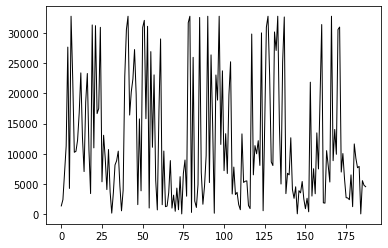

In [36]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed, linewidth=1.0, color='black')

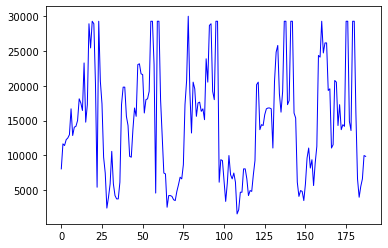

In [37]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed, linewidth=1.0, color='blue')

In [40]:
len(littmannArr)

188

In [41]:
len(asculArr)

188

### Coeffient

In [42]:
stats.pearsonr(asculArr_processed, littmannArr_processed)

(0.31568814327563477, 1.0194443364424604e-05)

In [44]:
stats.pearsonr(asculArr_processed[:100], littmannArr_processed[:100])

(0.3436428834891116, 0.0004644534131893949)

### Fitness

In [45]:
stats.chisquare(asculArr_processed[:80], littmannArr_processed[2:82])

Power_divergenceResult(statistic=722028.114779749, pvalue=0.0)

In [46]:
def cosCalculate(a, b):
    l = len(a)
    
    sumXY = 0
    sumRootXSquare = 0
    sumRootYSquare = 0
    
    for i in range(l):
        sumXY = sumXY + a[i]*b[i]
        sumRootXSquare = sumRootXSquare + math.sqrt(a[i]**2)
        sumRootYSquare = sumRootYSquare + math.sqrt(b[i]**2)
        
    cosValue = sumXY / (sumRootXSquare * sumRootYSquare)
    
    return cosValue    

In [47]:
cosCalculate(asculArr_processed, littmannArr_processed)

0.006115652405443805